In [2]:
#importing necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Read in the data
train = pd.read_csv('/Users/priyachaudhuri/Desktop/SSB TERM 1/Data Science/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#univariate analysis
train.describe()

#notice missing values in age


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#further column analysis
train.info()
# notice missing values in Cabin and Embarked too

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


[Text(0, 0, '549'), Text(0, 0, '342')]

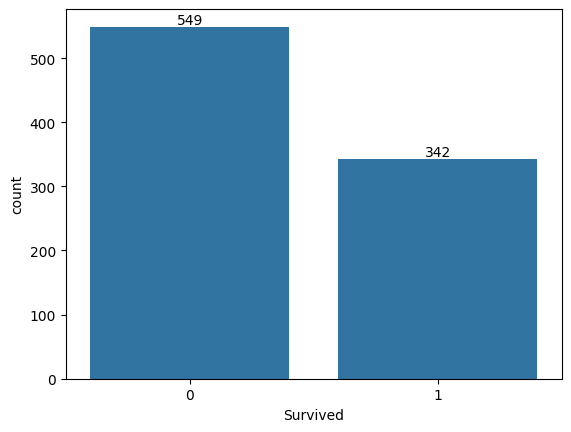

In [6]:
#understand no. of dead and alive passengers
ax1 = sns.countplot(x = 'Survived', data = train)
ax1.bar_label(ax1.containers[0])

[Text(0, 0, '577'), Text(0, 0, '314')]

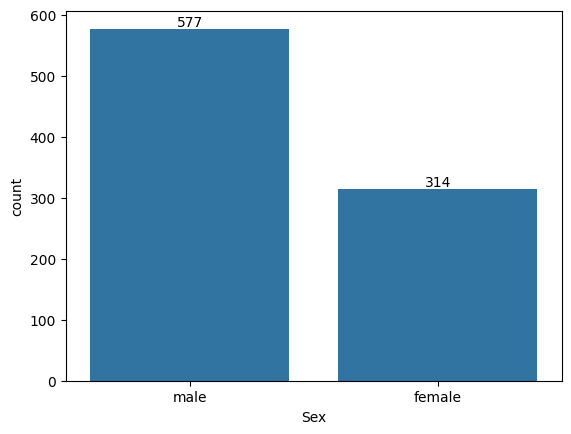

In [7]:
#Gender Counts
ax2 = sns.countplot(x = 'Sex', data = train)
ax2.bar_label(ax2.containers[0])

[Text(0, 0, '184'), Text(0, 0, '216'), Text(0, 0, '491')]

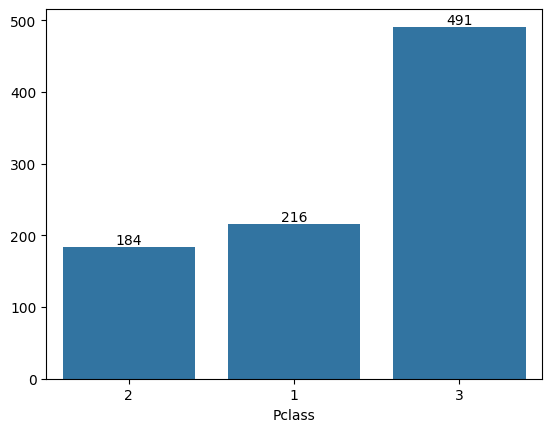

In [8]:
#Count by class
s = train['Pclass'].value_counts(ascending=True)
ax4 = sns.barplot(x=s.index, y=s.values, order=s.index) 
ax4.bar_label(ax4.containers[0])

Text(0.5, 0, 'Survived')

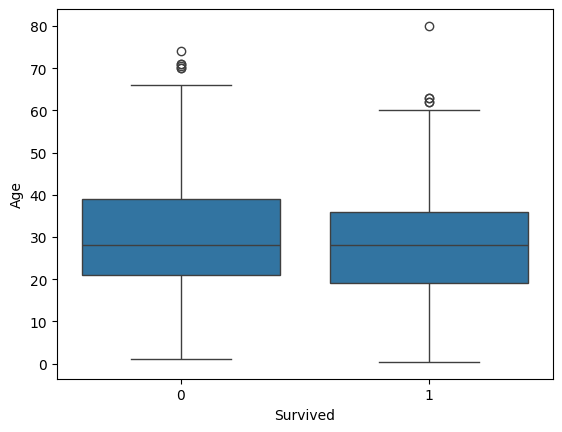

In [9]:
# box plot understanding which age group was highest - ???
sns.boxplot(x = 'Survived', y='Age', data = train)
plt.ylabel('Age')
plt.xlabel('Survived')

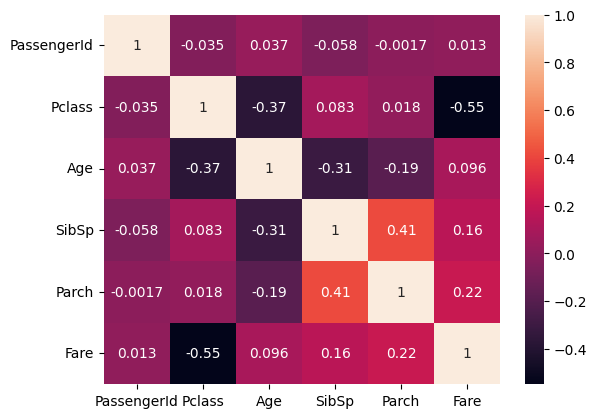

In [10]:
corr = train.drop(columns = 'Survived').select_dtypes('number').corr()
sns.heatmap(corr, annot = True);

In [11]:
# calculatin gender ratios
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of men who survived:", rate_men)
print("% of women who survived:", rate_women)

% of men who survived: 0.18890814558058924
% of women who survived: 0.7420382165605095


In [12]:
#mapping data with numbers to values
def map_data(df):

    survived_map = {0: 'Died', 1: 'Survived'}
    train['Survived'] = train['Survived'].map(survived_map)

    class_map = {1: 'First', 2: 'Second', 3: 'Third'}
    train['Pclass'] = train['Pclass'].map(class_map)
    
    return df

train = map_data(train)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Died,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Survived,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Survived,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Survived,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,Died,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Survived by Gender
table = pd.crosstab(train['Survived'],train['Sex'])
print(table)

Sex       female  male
Survived              
Died          81   468
Survived     233   109


[Text(0, 0, '100%'), Text(0, 0, '100%')]

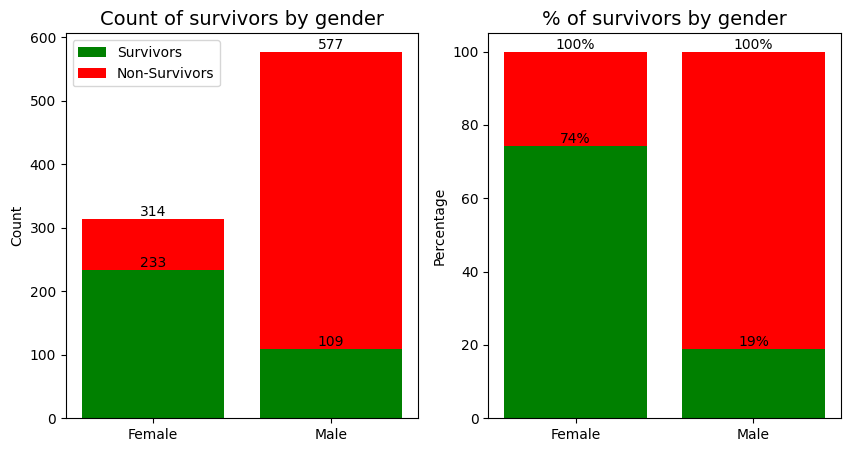

In [49]:
#plotting the view for Dead or Alive by Gender

# if value is Survived it data goes to survivors data and if it Died it goes to non-survivors data
survivors_data = train[train.Survived=='Survived']
non_survivors_data = train[train.Survived=='Died']

gender_categories = ['Female', 'Male']

survivors_gender = survivors_data.groupby(['Sex']).size().values
non_survivors_gender = non_survivors_data.groupby(['Sex']).size().values

totals = survivors_gender + non_survivors_gender

# Survivors/total or non-survivors/total
percent_alive = np.divide(survivors_gender, totals, dtype=float)*100
percent_dead = np.divide(non_survivors_gender, totals, dtype=float)*100

#Create a figure with two subplots in a single row using Matplotlib
# plt.subplots() is used to create a figure and a grid of subplots.
# 1, 2 specify the layout of the subplots. Here, 1 is the number of rows and 2 is the number of columns
# figsize=(10,5) sets the size of the entire figure. The width is 10 inches and the height is 5 inches
#(ax1, ax2) holds the references to the two subplot axes created. ax1 refers to the first subplot (on the left), ax2 refers to the second subplot (on the right).
#f is like the container for the subplots

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Create graph 1 - ax1
# range(len(survivors_gender)) generates a range of numbers from 0 to the length of the survivors_gender list - in our case 2.
# survivors_gender is a list (or array-like structure) containing the data to be plotted as the heights of the bars - counts.
# #label='Survivors' sets the label for this data series to 'Survivors', which can be used in the legend.
#alpha=1 sets the transparency level of the bars to 100%.

ax1.bar(range(len(survivors_gender)), survivors_gender, label='Survivors', alpha=1, color='g')
ax1.bar(range(len(non_survivors_gender)), non_survivors_gender, bottom=survivors_gender, label='Non-Survivors', alpha=1, color='r')

# This is useful if you want to make changes specifically to ax1 without having to reference it directly in each subsequent command.
# xticks is used to position the Male and Female label on xaxis
plt.sca(ax1)
plt.xticks([0.0, 1.0], gender_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by gender",fontsize=14)
plt.legend(loc='upper left')
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])


# plot chart for percentage of survivors by gender
ax2.bar(range(len(percent_alive)), percent_alive, alpha=1, color='g')
ax2.bar(range(len(percent_dead)), percent_dead, bottom=percent_alive, alpha=1, color='r')
plt.sca(ax2)
plt.xticks([0.0, 1.0],  gender_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by gender",fontsize=14)
ax2.bar_label(ax2.containers[0], fmt='%.f%%')
ax2.bar_label(ax2.containers[1], fmt='%.f%%')

[Text(0, 0, '100%'), Text(0, 0, '100%'), Text(0, 0, '100%')]

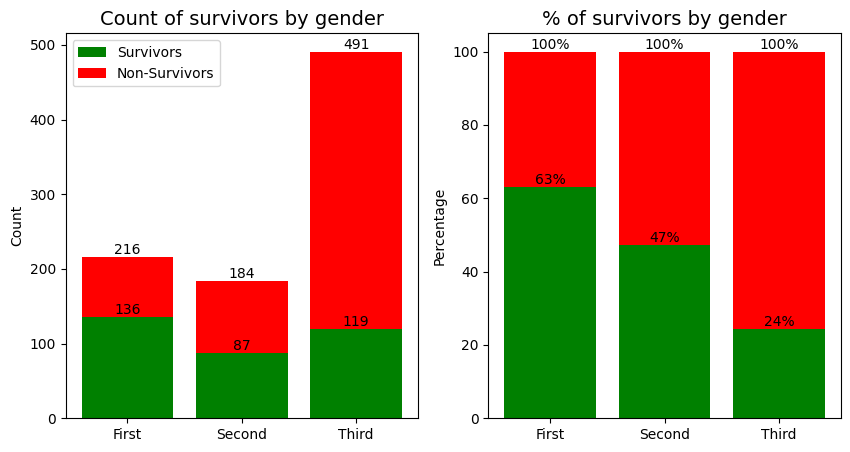

In [42]:
#plotting the view for Dead or Alive by Class

survivors_data = train[train.Survived=='Survived']
non_survivors_data = train[train.Survived=='Died']
class_categories = ['First', 'Second', 'Third']

survivors_class = survivors_data.groupby(['Pclass']).size().values
non_survivors_class = non_survivors_data.groupby(['Pclass']).size().values

totals = survivors_class + non_survivors_class
#data1_percentages = calculate_percentage(survivors_gender, totals)*100 
#data2_percentages = calculate_percentage(non_survivors_gender, totals)*100 
percent_alive1 = np.divide(survivors_class, totals, dtype=float)*100
percent_dead1 = np.divide(non_survivors_class, totals, dtype=float)*100

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.bar(range(len(survivors_class)), survivors_class, label='Survivors', alpha=1, color='green')
ax1.bar(range(len(non_survivors_class)), non_survivors_class, bottom=survivors_class, label='Non-Survivors', alpha=1, color='red')
plt.sca(ax1)
plt.xticks([0.0, 1.0, 2.0], class_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by gender",fontsize=14)
plt.legend(loc='upper left')
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])


# plot chart for percentage of survivors by class
ax2.bar(range(len(percent_alive1)), percent_alive1, alpha=1, color='green')
ax2.bar(range(len(percent_dead1)), percent_dead1, bottom=percent_alive1, alpha=1, color='red')
plt.sca(ax2)
plt.xticks([0.0, 1.0, 2.0],  class_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by gender",fontsize=14)
ax2.bar_label(ax2.containers[0],fmt='%.f%%')
ax2.bar_label(ax2.containers[1],fmt='%.f%%')

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_20758/4057474448.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survivors_age = survivors_data.groupby(['age_group']).size().values
/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_20758/4057474448.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  non_survivors_age = non_survivors_data.groupby(['age_group']).size().values


[Text(0, 0, '100%'),
 Text(0, 0, '100%'),
 Text(0, 0, '100%'),
 Text(0, 0, '100%'),
 Text(0, 0, '100%'),
 Text(0, 0, '100%'),
 Text(0, 0, '100%'),
 Text(0, 0, '100%')]

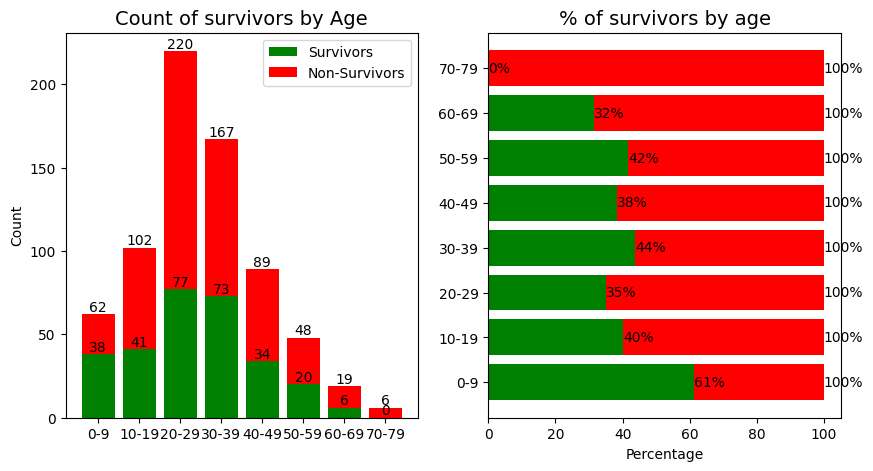

In [50]:
#plotting the view for Dead or Alive by age Group


age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
train['age_group'] = pd.cut(train.Age, range(0, 81, 10), right=False, labels=age_labels)

survivors_data = train[train.Survived=='Survived']
non_survivors_data = train[train.Survived=='Died']
age_categories = age_labels

survivors_age = survivors_data.groupby(['age_group']).size().values
non_survivors_age = non_survivors_data.groupby(['age_group']).size().values

totals = survivors_age + non_survivors_age
#data1_percentages = calculate_percentage(survivors_gender, totals)*100 
#data2_percentages = calculate_percentage(non_survivors_gender, totals)*100 
percent_alive2 = np.divide(survivors_age, totals, dtype=float)*100
percent_dead2 = np.divide(non_survivors_age, totals, dtype=float)*100

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.bar(range(len(survivors_age)), survivors_age, label='Survivors', alpha=1, color='green')
ax1.bar(range(len(non_survivors_age)), non_survivors_age, bottom=survivors_age, label='Non-Survivors', alpha=1, color='red')
plt.sca(ax1)
plt.xticks([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], age_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by Age",fontsize=14)
plt.legend(loc='upper right')
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])


# plot chart for percentage of survivors by age group
ax2.barh(range(len(percent_alive2)), percent_alive2, alpha=1, color='green')
ax2.barh(range(len(percent_dead2)), percent_dead2, left=percent_alive2, alpha=1, color='red')
plt.sca(ax2)
plt.yticks(range(len(age_categories)),  age_categories )
ax2.set_xlabel("Percentage")
ax2.set_ylabel("")
ax2.set_title("% of survivors by age",fontsize=14)
ax2.bar_label(ax2.containers[0], fmt='%.f%%')
ax2.bar_label(ax2.containers[1], fmt='%.f%%')

In [20]:
# Checking count for each age group
table = pd.crosstab(train['Survived'],train['age_group'])
print(table)

age_group  0-9  10-19  20-29  30-39  40-49  50-59  60-69  70-79
Survived                                                       
Died        24     61    143     94     55     28     13      6
Survived    38     41     77     73     34     20      6      0


[Text(0, 0, '62'),
 Text(0, 0, '102'),
 Text(0, 0, '220'),
 Text(0, 0, '167'),
 Text(0, 0, '89'),
 Text(0, 0, '48'),
 Text(0, 0, '19'),
 Text(0, 0, '6')]

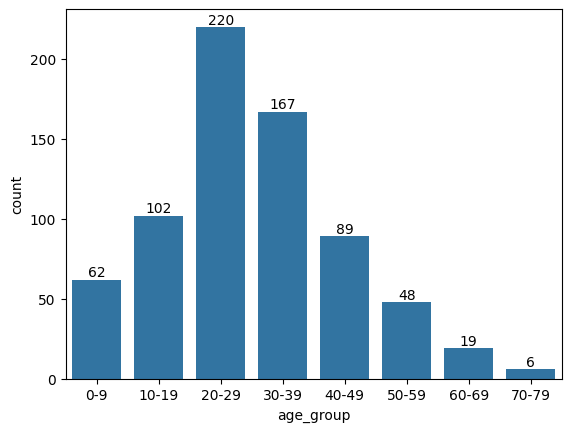

In [21]:
#age_group Counts
p1 = sns.countplot(x = 'age_group', data = train)
p1.bar_label(p1.containers[0])

In [57]:
from statistics import mean

In [83]:
#filering on survived people
survived_df = train[train['Survived'] == 'Survived']
survived_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
1,2,Survived,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39
2,3,Survived,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29
3,4,Survived,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39
8,9,Survived,Third,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,20-29
9,10,Survived,Second,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,10-19


/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_19619/3436137028.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  male_data = survived_df[survived_df.Sex == "male"].groupby('age_group').Survived.size().values
/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_19619/3436137028.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  female_data = survived_df[survived_df.Sex == "female"].groupby('age_group').Survived.size().values


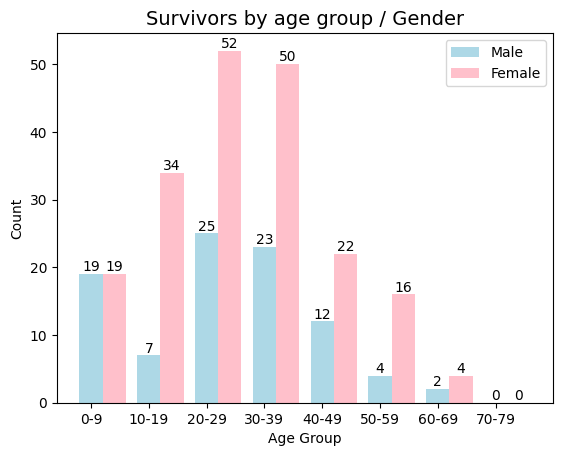

In [119]:
# plotting gender by age group for people who survived
#survived_df is a DataFrame containing data about survivors.
#survived_df[survived_df.Sex == "male"] filters the DataFrame to include only rows where the Sex is "male".
#groupby('age_group').Survived.size().values groups the filtered DataFrame by the age_group column and calculates the size (count) of the Survived column for each group, then extracts the values.

male_data = survived_df[survived_df.Sex == "male"].groupby('age_group').Survived.size().values
female_data = survived_df[survived_df.Sex == "female"].groupby('age_group').Survived.size().values
ax = plt.subplot()

#age_labels is a list of age group labels.
#male_plt_position creates an array of positions for male bars.
#female_plt_position shifts these positions by 0.4 to the right, so the male and female bars for each age group don't overlap.

male_plt_position = np.array(range(len(age_labels)))
female_plt_position = np.array(range(len(age_labels)))+0.4
ax.bar(male_plt_position, male_data,width=0.4,label='Male',color='lightblue')
ax.bar(female_plt_position, female_data,width=0.4,label='Female',color='pink')
plt.xticks([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],  age_labels)
ax.set_ylabel("Count")
ax.set_xlabel("Age Group")
ax.set_title("Survivors by age group / Gender",fontsize=14)
plt.legend(loc='best')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])  # Add labels for female bars
plt.show()

In [94]:
#Checking values for males and females
t = survived_df.groupby(['Sex','age_group']).Survived.size().values
print(t)

[19 34 52 50 22 16  4  0 19  7 25 23 12  4  2  0]


/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_19619/464992683.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t = survived_df.groupby(['Sex','age_group']).Survived.size().values


In [32]:
dead_df = train[train['Survived'] == 'Died']
dead_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,Died,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29
4,5,Died,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39
5,6,Died,Third,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,Died,First,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,50-59
7,8,Died,Third,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0-9


/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_20758/2102570918.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  male_data = dead_df[dead_df.Sex == "male"].groupby('age_group').Survived.size().values
/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_20758/2102570918.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  female_data = dead_df[dead_df.Sex == "female"].groupby('age_group').Survived.size().values


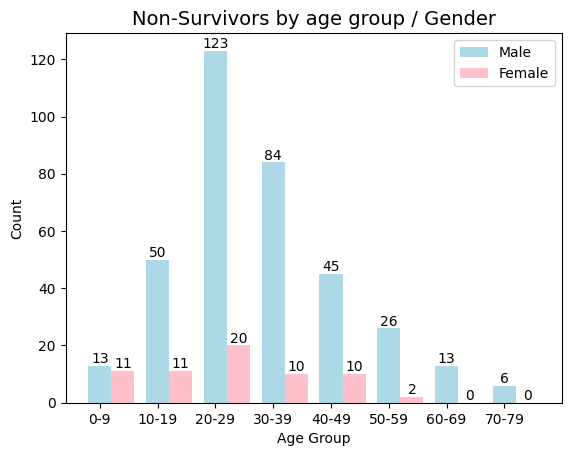

In [34]:
# plotting gender by age group for people who died
#survived_df is a DataFrame containing data about non-survivors.
#survived_df[survived_df.Sex == "male"] filters the DataFrame to include only rows where the Sex is "male".
#groupby('age_group').Survived.size().values groups the filtered DataFrame by the age_group column and calculates the size (count) of the Survived column for each group, then extracts the values.

male_data = dead_df[dead_df.Sex == "male"].groupby('age_group').Survived.size().values
female_data = dead_df[dead_df.Sex == "female"].groupby('age_group').Survived.size().values
ax = plt.subplot()

#age_labels is a list of age group labels.
#male_plt_position creates an array of positions for male bars.
#female_plt_position shifts these positions by 0.4 to the right, so the male and female bars for each age group don't overlap.

male_plt_position = np.array(range(len(age_labels)))
female_plt_position = np.array(range(len(age_labels)))+0.4
ax.bar(male_plt_position, male_data,width=0.4,label='Male',color='lightblue')
ax.bar(female_plt_position, female_data,width=0.4,label='Female',color='pink')
plt.xticks([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],  age_labels)
ax.set_ylabel("Count")
ax.set_xlabel("Age Group")
ax.set_title("Non-Survivors by age group / Gender",fontsize=14)
plt.legend(loc='best')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])  # Add labels for female bars
plt.show()

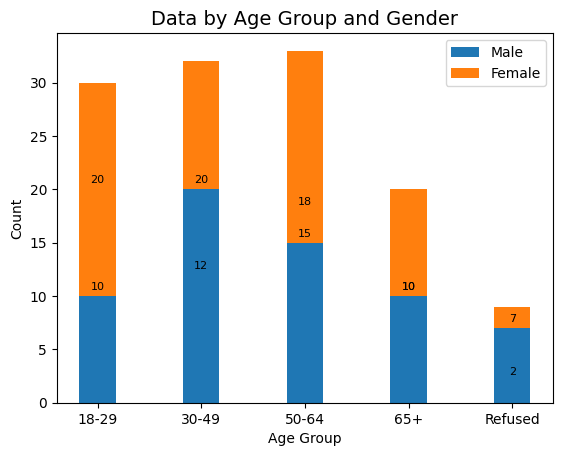

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
age_labels = ['18-29', '30-49', '50-64', '65+', 'Refused']
male_data = [10, 20, 15, 10, 7]  # Sample male data for each age group
female_data = [20, 12, 18, 10, 2]  # Sample female data for each age group

# Total count for each age group
total_counts = np.array(male_data) + np.array(female_data)

fig, ax = plt.subplots()

bar_width = 0.35
x = np.arange(len(age_labels))

bars1 = ax.bar(x, male_data, bar_width, label='Male')
bars2 = ax.bar(x, female_data, bar_width, bottom=male_data, label='Female')

ax.set_xticks(x)
ax.set_xticklabels(age_labels)
ax.set_ylabel("Count")
ax.set_xlabel("Age Group")
ax.set_title("Data by Age Group and Gender", fontsize=14)
ax.legend()


def autolabel(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)


# Add labels for each bar
autolabel(bars1)
autolabel(bars2)

plt.show()
